In [24]:
#######################################3
## 네이버 지식인으로 데이터 가져오기
########################################

import requests
import pandas as pd

# 네이버 개발자 센터에서 발급받은 클라이언트 ID와 시크릿을 입력합니다.
client_id = 'UGWFRw8nJK3z1B_irpX9'
client_secret = 'tGq_GW6jBz'
query = '치킨'

url = 'https://openapi.naver.com/v1/search/kin.json' # 네이버지식인


# 요청 헤더에 인증 정보를 추가합니다.
headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

params = {
    "query": query,
    "display": 100  # 가져올 결과 수 (최대 100)
}

# API에 GET 요청을 보냅니다.
# 구글검색 '파이썬 response 응답번호'
response = requests.get(url, headers=headers,params=params)
result=response.json()
import pandas as pd
df=pd.DataFrame(result['items'])
df.head()

,title,link,description
0,통풍 <b>치킨</b> 먹고싶은데,https://kin.naver.com/qna/detail.naver?d1id=7&...,"제가 통풍이 있는데, <b>치킨</b>을 정말 좋아한단 말이에요. 통풍이 완치가 되..."
1,<b>치킨</b>은 건강음식이죠?,https://kin.naver.com/qna/detail.naver?d1id=7&...,"<b>치킨</b>은 건강음식이죠? 안녕하세요, 닥톡-네이버 지식iN 상담영양사 주소..."
2,교정 중 <b>치킨</b> 먹어도 될까요?,https://kin.naver.com/qna/detail.naver?d1id=7&...,... 앞니에 브라켓을 붙이지 않았으니까 <b>치킨</b>을 먹더라도... 교정 초...
3,<b>치킨</b> 막걸리 어울리나요???,https://kin.naver.com/qna/detail.naver?d1id=8&...,"<b>치킨</b>이랑 막걸리? 안녕하세요, 술마켓 입니다. 최근... 종종 <b>치..."
4,코성형 <b>치킨</b>,https://kin.naver.com/qna/detail.naver?d1id=7&...,코성형 4일차인데 일반밥먹고있긴한데 <b>치킨</b> 먹어도되냐요? 닭이나돼지고기 ...


In [4]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 31.9 MB/s eta 0:00:00


In [25]:
data=df.copy()

In [17]:
import re

df['title'] = df['title'].str.replace(r'<b>\s*(.*?)\s*</b>', r'\1', regex=True)
df['title'] = df['title'].str.replace('치킨', '', regex=True)
df['description'] = df['description'].str.replace(r'<b>\s*(.*?)\s*</b>', r'\1', regex=True)
df.head()

,title,link,description
0,통풍 먹고싶은데,https://kin.naver.com/qna/detail.naver?d1id=7&...,"제가 통풍이 있는데, 치킨을 정말 좋아한단 말이에요. 통풍이 완치가 되나요? 통풍이..."
1,은 건강음식이죠?,https://kin.naver.com/qna/detail.naver?d1id=7&...,"치킨은 건강음식이죠? 안녕하세요, 닥톡-네이버 지식iN 상담영양사 주소영입니다. 치..."
2,교정 중 먹어도 될까요?,https://kin.naver.com/qna/detail.naver?d1id=7&...,... 앞니에 브라켓을 붙이지 않았으니까 치킨을 먹더라도... 교정 초기라 불편함도...
3,막걸리 어울리나요???,https://kin.naver.com/qna/detail.naver?d1id=8&...,"치킨이랑 막걸리? 안녕하세요, 술마켓 입니다. 최근... 종종 치킨과 함께 막걸리를..."
4,코성형,https://kin.naver.com/qna/detail.naver?d1id=7&...,코성형 4일차인데 일반밥먹고있긴한데 치킨 먹어도되냐요? 닭이나돼지고기 염증유발한다해...


In [9]:
df['description'][0]

'제가 통풍이 있는데, 치킨을 정말 좋아한단 말이에요. 통풍이 완치가 되나요? 통풍이 어느정도 좋아지면 치킨을... 치료를 잘 하셔서 요산이 잘 조절되고, 이런 기간이 오래된 경우에는 치킨을 먹을 수 있습니다. 절대 못 먹는 음식은... '

In [18]:
###################
## 한국어 형태소 분석기 샘플
##############
from konlpy.tag import Okt

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 분석할 문장
sentence = df['description'][0]

# 형태소 분석 및 품사 태깅
morphs = okt.morphs(sentence)
pos = okt.pos(sentence)

# 결과 출력
print("형태소 분석:", morphs)
print("품사 태깅:", pos)

형태소 분석: ['제', '가', '통풍', '이', '있는데', ',', '치킨', '을', '정말', '좋아한단', '말', '이에요', '.', '통풍', '이', '완치', '가', '되나요', '?', '통풍', '이', '어느', '정도', '좋아지면', '치킨', '을', '...', '치료', '를', '잘', '하셔서', '요산', '이', '잘', '조절', '되고', ',', '이런', '기간', '이', '오래된', '경우', '에는', '치킨', '을', '먹을', '수', '있습니다', '.', '절대', '못', '먹는', '음식', '은', '...']
품사 태깅: [('제', 'Noun'), ('가', 'Josa'), ('통풍', 'Noun'), ('이', 'Josa'), ('있는데', 'Adjective'), (',', 'Punctuation'), ('치킨', 'Noun'), ('을', 'Josa'), ('정말', 'Noun'), ('좋아한단', 'Adjective'), ('말', 'Noun'), ('이에요', 'Josa'), ('.', 'Punctuation'), ('통풍', 'Noun'), ('이', 'Josa'), ('완치', 'Noun'), ('가', 'Josa'), ('되나요', 'Verb'), ('?', 'Punctuation'), ('통풍', 'Noun'), ('이', 'Josa'), ('어느', 'Modifier'), ('정도', 'Noun'), ('좋아지면', 'Verb'), ('치킨', 'Noun'), ('을', 'Josa'), ('...', 'Punctuation'), ('치료', 'Noun'), ('를', 'Josa'), ('잘', 'Verb'), ('하셔서', 'Verb'), ('요산', 'Noun'), ('이', 'Josa'), ('잘', 'Verb'), ('조절', 'Noun'), ('되고', 'Verb'), (',', 'Punctuation'), ('이런', 'Adjective'), ('기간', 'N

In [19]:
nouns=[]

for title in df['title']:
    nouns.extend(okt.nouns(title))   # nouns는 태그중 명사.
nouns[:3], len(nouns)

(['통풍', '은', '건강'], 232)

In [30]:
# 명사 빈도수 계산
# Counter는 중복제거하고, 갯수세어줌
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nouns_count = Counter(nouns) # sort안되어 있음.

# 빈도수 상위 10개 출력
display(nouns_count.most_common(10))  # 튜플제공됨

[('추천', 11),
 ('요', 7),
 ('다이어트', 6),
 ('칼로리', 4),
 ('계', 4),
 ('방법', 4),
 ('좀', 4),
 ('통풍', 3),
 ('은', 3),
 ('건강', 3)]

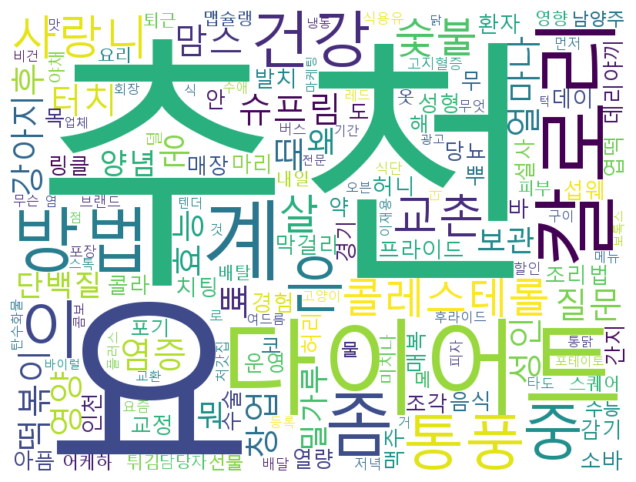

In [21]:
# 워드클라우드 생성
# malgun.ttf를 구글 코렙에 올림
wordcloud = WordCloud(
    font_path='/content/malgun.ttf',  # 한글 폰트 경로 설정 (예: 'malgun.ttf')
    background_color='white',
    width=800,
    height=600
).generate_from_frequencies(nouns_count)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
df[df['title']'통풍']

,title,link,description


In [29]:
# prompt: df['title'] 필드에 '통풍'글자가 포함된
query='남양주'
data[df['title'].str.contains(query)]

,title,link,description
36,"통풍 <b>치킨</b>,맥주 포기해야해요?(남양주 통풍)",https://kin.naver.com/qna/detail.naver?d1id=7&...,"... 통풍 <b>치킨</b>을 국화페놀 먹고 있으면 그나마 괜찮다고 하던데, 국화..."


In [33]:
#################################################
###  작업에서의 명사빈도수 작업
#################################################

# 명사 빈도수 계산
# Counter는 중복제거하고, 갯수세어줌
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nouns_count = Counter(nouns) # sort안되어 있음.

# 빈도수 상위 10개 출력
display(nouns_count.most_common(10))  # 튜플제공됨



[('추천', 11),
 ('요', 7),
 ('다이어트', 6),
 ('칼로리', 4),
 ('계', 4),
 ('방법', 4),
 ('좀', 4),
 ('통풍', 3),
 ('은', 3),
 ('건강', 3)]

In [36]:
# prompt: nouns_count.most_common를 단어와, 빈도수로 데이터프레임으로  변경하고 csv로 저장

import pandas as pd

# Assuming nouns_count is already defined from the previous code
# nouns_count = Counter(nouns)

# Convert the most_common output to a DataFrame
df_nouns = pd.DataFrame(nouns_count.most_common(), columns=['단어', '빈도수'])
display(df_nouns)

# Save the DataFrame to a CSV file
df_nouns.to_csv('nouns_frequency.csv', index=False, encoding='utf-8-sig')

,단어,빈도수
0,추천,11
1,요,7
2,다이어트,6
3,칼로리,4
4,계,4
...,...,...
152,전문,1
153,업체,1
154,턱,1
155,보톡스,1
